In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datasets import Dataset

In [20]:
# add color column to given data frame
def add_color_column(dataframe):
    colors = []
    for d in dataframe['label']:
        if d == 0:
            colors.append('grey')
        if d == 1:
            colors.append('orange')
        if d == 2:
            colors.append('red')
        if d == 3:
            colors.append('black')
        if d == 4:
            colors.append('purple')
        if d == 5:
            colors.append('blue')
        if d == 6:
            colors.append('darkgreen')
        if d == 7:
            colors.append('pink')
        if d == 8:
            colors.append('yellow')
        if d == 9:
            colors.append('brown')
        if d == 10:
            colors.append('green')
    # add them to the data frame
    dataframe['colors'] = colors

In [3]:
# load KMeans labels
labels = np.load('../data/cluster_labels.npy')

In [7]:
# load data
videos = Dataset.load_from_disk('../data/videos')

In [13]:
# load 2d distance matrix
distance_matrix = np.load('../data/2d_distance_matrix_tsne.npy')

In [21]:
df = pd.DataFrame(videos)
df['label'] = labels
df['x'] = distance_matrix[:,[0]]
df['y'] = distance_matrix[:,[1]]
add_color_column(df)

In [22]:
df

,id,title,description,channel,text,label,x,y,colors
0,28,Twenty years on John Bolton is still defending...,John Bolton was a senior adviser to United St...,Al-Jazeera-English,Twenty years on John Bolton is still defending...,0,-1.895455,37.667088,grey
1,29,Paul Bremer on Iraq occupation mistakes and ac...,It’s been 20 years since the United States an...,Al-Jazeera-English,Paul Bremer on Iraq occupation mistakes and ac...,10,-43.439976,7.885867,green
2,88,Indian opposition leader Rahul Gandhi disquali...,Indian opposition leader Rahul Gandhi has bee...,Al-Jazeera-English,Indian opposition leader Rahul Gandhi disquali...,0,-33.909504,12.501862,grey
3,89,India’s Rahul Gandhi disqualified from parliament,India’s main opposition leader Rahul Gandhi h...,Al-Jazeera-English,India’s Rahul Gandhi disqualified from parliam...,1,2.158688,33.094646,orange
4,179,TikTok CEO Shou Zi Chew faces off with US legi...,The head of the world's fastest-growing socia...,Al-Jazeera-English,TikTok CEO Shou Zi Chew faces off with US legi...,9,-10.354036,-21.840181,brown
...,...,...,...,...,...,...,...,...,...
7903,228295,How does Bill Clinton's tapes-in-sock-drawer c...,Mark Levin sounds off on 'Hannity' after Trum...,Fox-News,How does Bill Clinton's tapes-in-sock-drawer c...,5,-78.497955,10.271462,blue
7904,228296,Judge Jeanine: Biden knows he has a lot to hid...,Judge Jeanine Pirro joined The Brian Kilmeade...,Fox-News,Judge Jeanine: Biden knows he has a lot to hid...,9,-24.592028,-36.484093,brown
7905,228297,What about the 17 recordings implicating Presi...,'Fox \u0026 Friends Weekend' co-host Will Cai...,Fox-News,What about the 17 recordings implicating Presi...,8,55.480789,-39.254757,yellow
7906,228298,Jesse Watters: Biden banned a trans flasher fr...,Actor Kirk Cameron weighs in on transgender a...,Fox-News,Jesse Watters: Biden banned a trans flasher fr...,8,-56.278282,35.038597,yellow


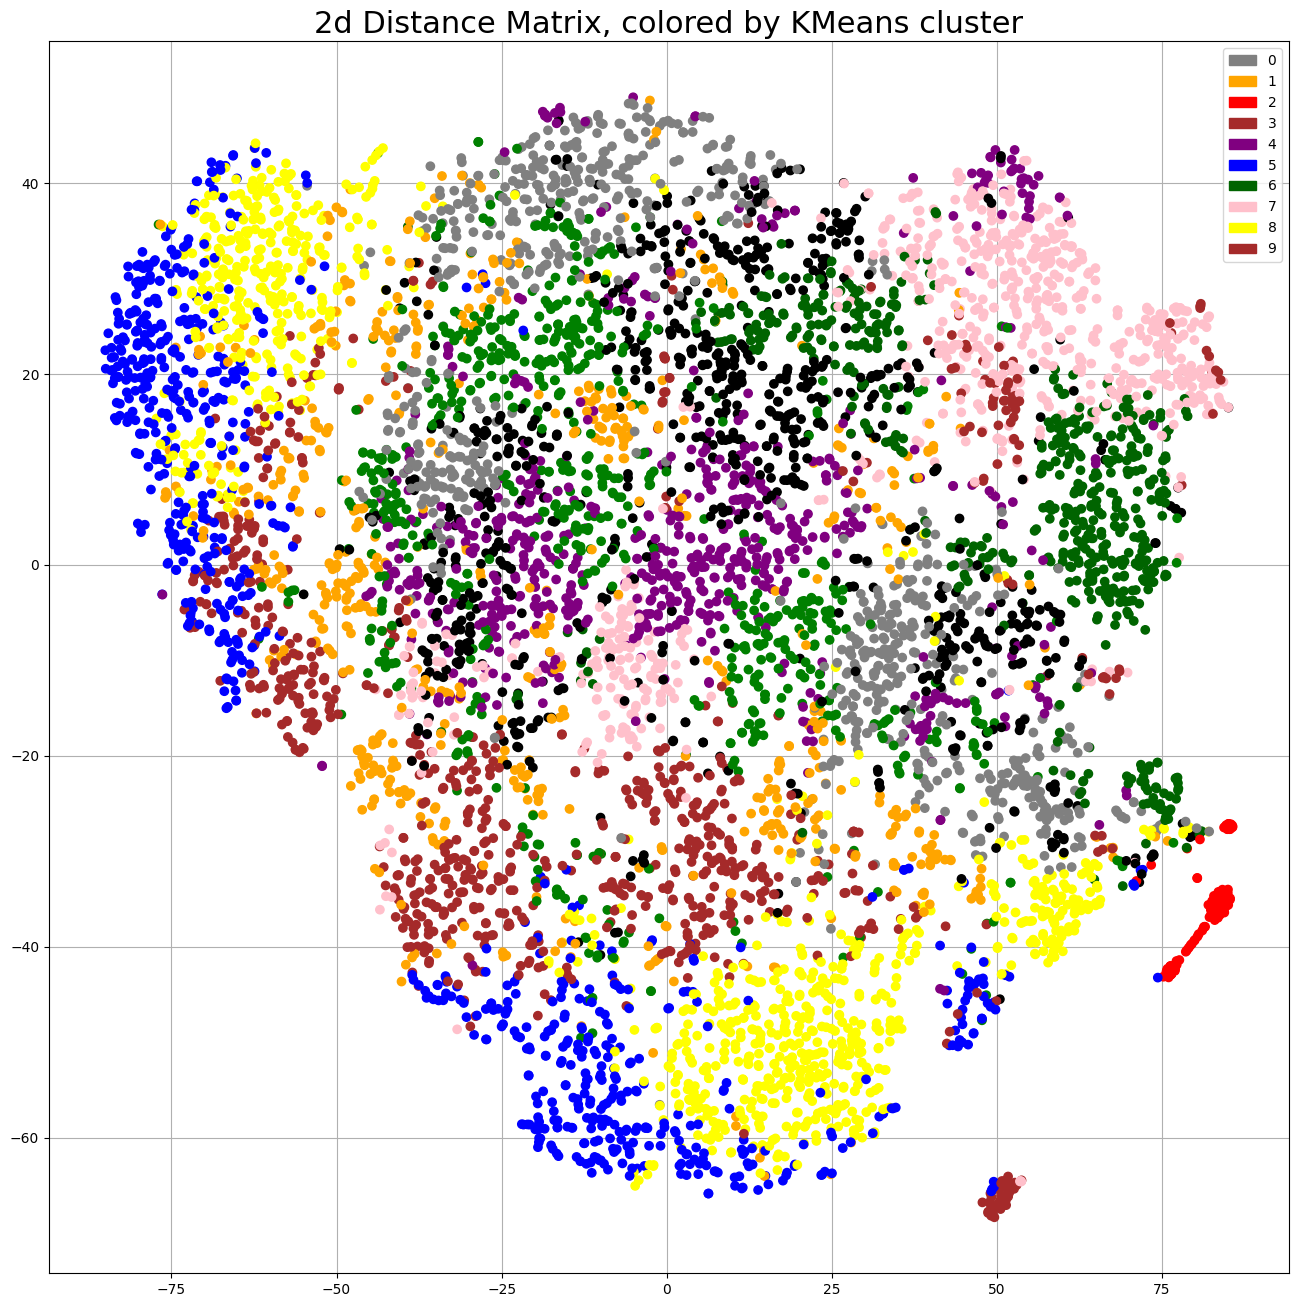

In [25]:
# Creating legend with color box
pop_a = mpatches.Patch(color='orange', label=1)
pop_b = mpatches.Patch(color='red', label=2)
pop_c = mpatches.Patch(color='brown', label=3)
pop_d = mpatches.Patch(color='purple', label=4)
pop_e = mpatches.Patch(color='blue', label=5)
pop_f = mpatches.Patch(color='darkgreen', label=6)
pop_g = mpatches.Patch(color='grey', label=0)
pop_h = mpatches.Patch(color='pink', label=7)
pop_i = mpatches.Patch(color='yellow', label=8)
pop_j = mpatches.Patch(color='brown', label=9)
pop_k = mpatches.Patch(color='green', label=10)
# create plot
fig, ax = plt.subplots(figsize=(16,16))
# set axis behind other elements
ax.set_axisbelow(True)
# add grid
ax.grid()
# scatter plot distance matrix
ax.scatter(df['x'], df['y'], c=df['colors'])
# add ids
'''
for i, txt, in enumerate(distance_matrix_ids):
    if i % 100 == 0:
        ax.annotate(str(txt), (df['x'][i], df['y'][i]))
'''
# add title, legend
plt.title(f'2d Distance Matrix, colored by KMeans cluster', fontsize=22)
ax.legend(handles=[pop_g, pop_a, pop_b, pop_c, pop_d, pop_e, pop_f, pop_h, pop_i, pop_j])